# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/data.csv')
display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Customer Demographics Analysis

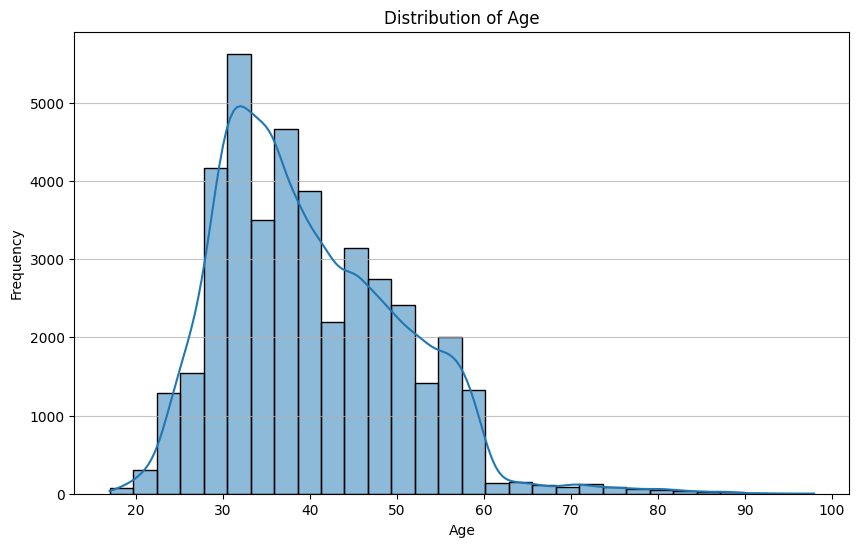

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

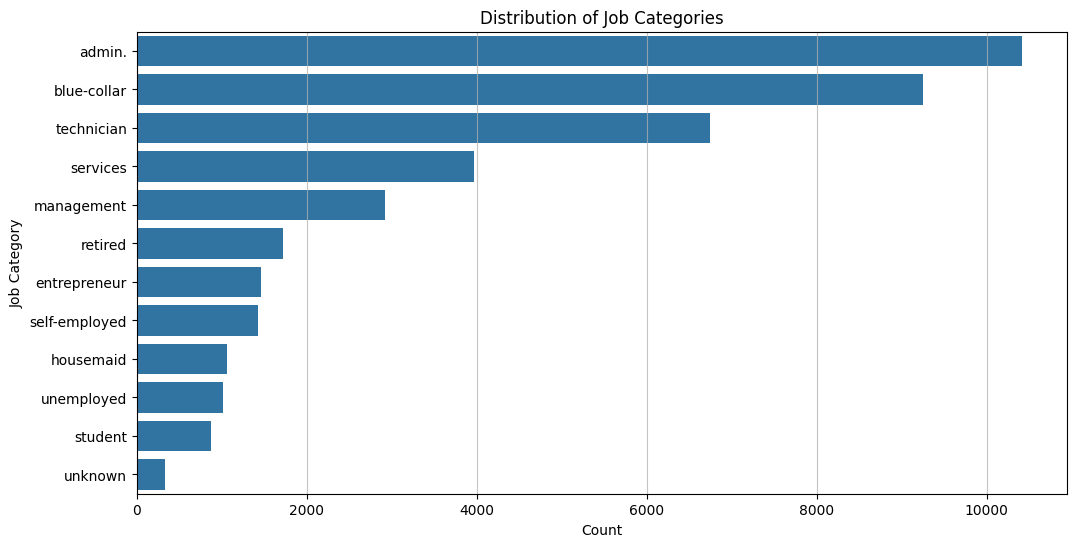

In [ ]:
# Job distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=df, order = df['job'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.grid(axis='x', alpha=0.75)
plt.show()

## Campaign Effectiveness

<Figure size 800x600 with 0 Axes>

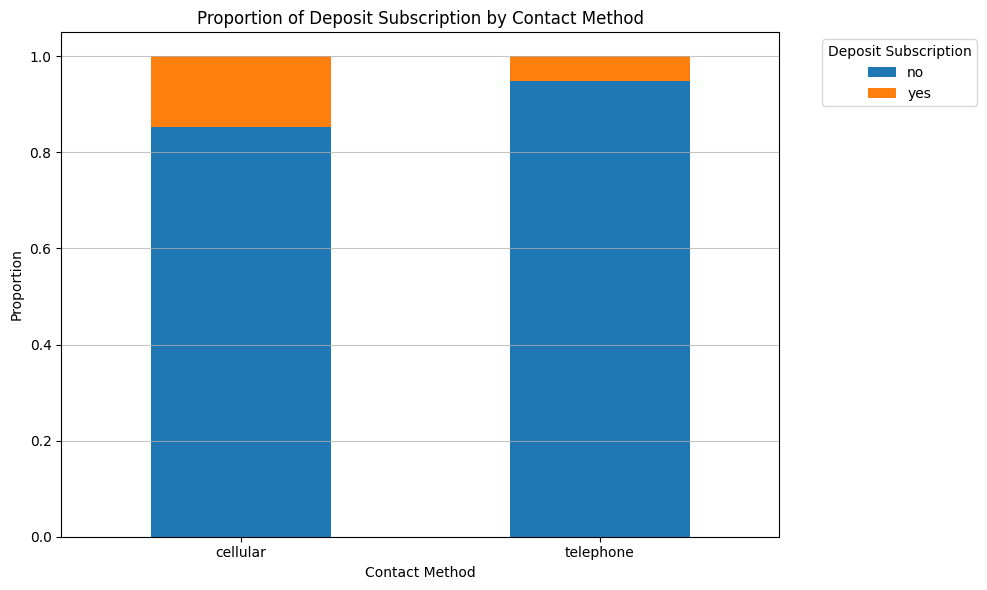

y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


In [ ]:
# Contact method analysis
contact_deposit_proportion = df.groupby('contact')['y'].value_counts(normalize=True).unstack().fillna(0)

# Filter for 'cellular' and 'telephone' contacts
contact_deposit_proportion_filtered = contact_deposit_proportion.loc[['cellular', 'telephone']]

plt.figure(figsize=(8, 6))
contact_deposit_proportion_filtered.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Deposit Subscription by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Deposit Subscription', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

display(contact_deposit_proportion_filtered)

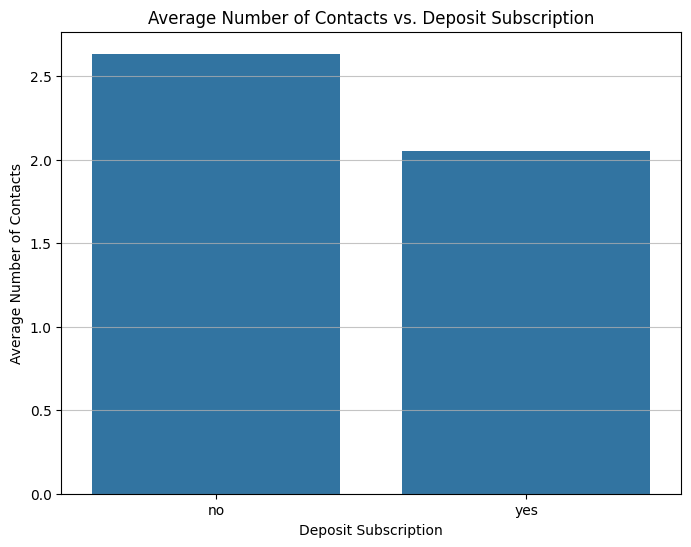

,y,campaign
0,no,2.633085
1,yes,2.051724


In [ ]:
# Number of contacts vs deposit subscription
avg_campaign_by_deposit = df.groupby('y')['campaign'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='y', y='campaign', data=avg_campaign_by_deposit)
plt.title('Average Number of Contacts vs. Deposit Subscription')
plt.xlabel('Deposit Subscription')
plt.ylabel('Average Number of Contacts')
plt.grid(axis='y', alpha=0.75)
plt.show()

display(avg_campaign_by_deposit)

## Correlation Heatmap

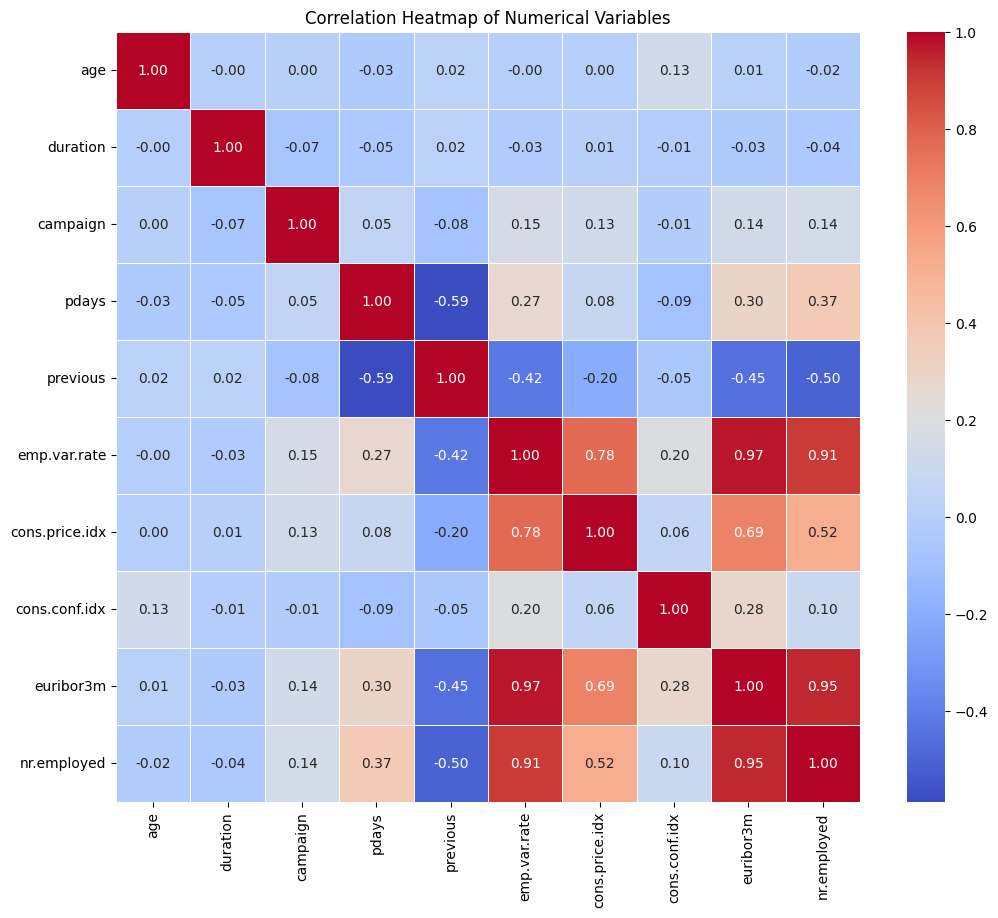

In [ ]:
# Correlation of numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Predictive Modeling (Logistic Regression)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0) # Convert 'yes'/'no' to 1/0

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing to training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(encoded_feature_names)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.9123

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.68      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



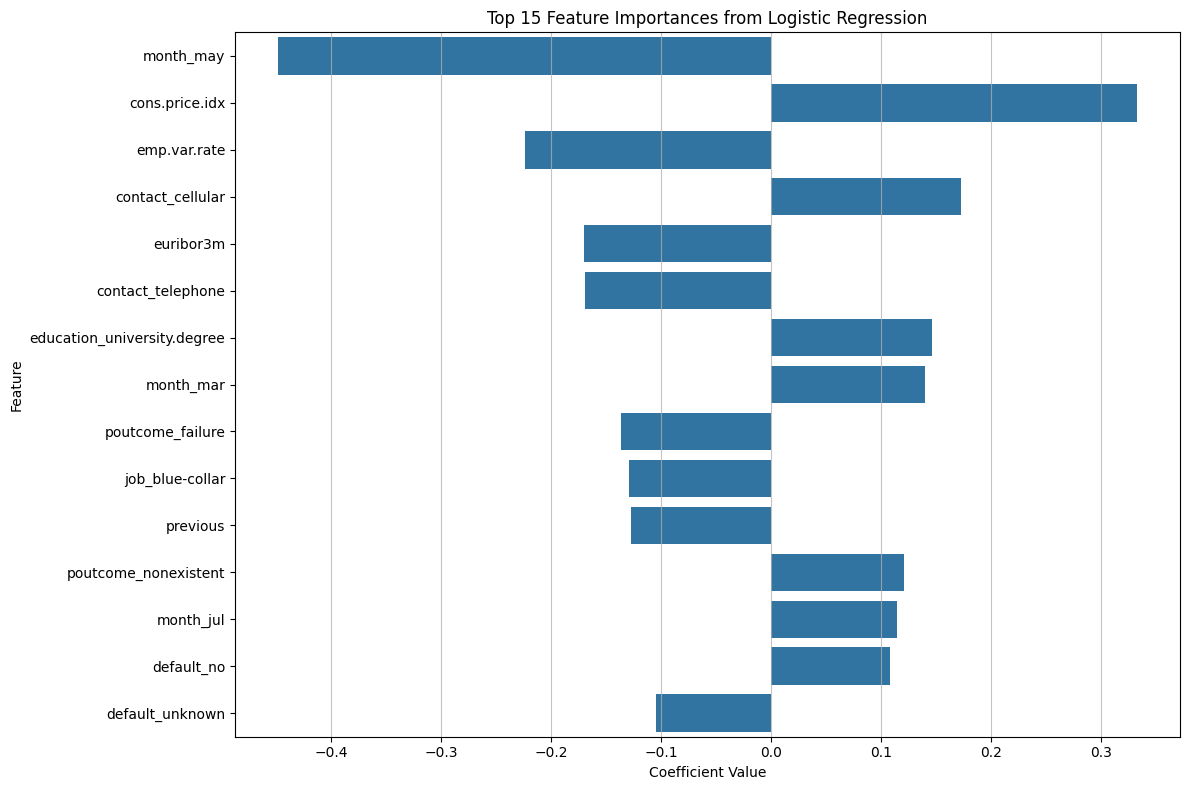

,feature,importance,abs_importance
41,month_may,-0.448468,0.448468
59,cons.price.idx,0.332656,0.332656
58,emp.var.rate,-0.223519,0.223519
33,contact_cellular,0.172446,0.172446
61,euribor3m,-0.170590,0.170590
34,contact_telephone,-0.169570,0.169570
22,education_university.degree,0.146221,0.146221
40,month_mar,0.140069,0.140069
50,poutcome_failure,-0.136705,0.136705
1,job_blue-collar,-0.129482,0.129482


In [ ]:
# Feature importance

# Get coefficients from the trained model
feature_importance = pd.DataFrame({
    'feature': all_feature_names,
    'importance': model.coef_[0]
})

# Sort by absolute importance
feature_importance['abs_importance'] = abs(feature_importance['importance'])
feature_importance = feature_importance.sort_values(by='abs_importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

display(feature_importance.head(15))